# Youtube comment analysis using PrimeText

In [1]:
%matplotlib inline

In [2]:
import sys
import pandas as pa
import numpy as np
from PrimeText import PrimeText
import matplotlib.pyplot as plt

In [6]:
pt = PrimeText()
ytData = pa.read_csv("utubelabled.csv",encoding ='ISO-8859-1')
comments = ytData['comment']

In [7]:
comments = comments.str.replace('ï»¿','')

In [8]:
labels = pt.cleanData(comments,ytData['troll'])
pt.assembleDictionary()
pt.indexDictionary()
pt.indexComments()

Records cleaned : 3936 / 3936
Records checked : 3468
Indexed dictionary
Indexed comments


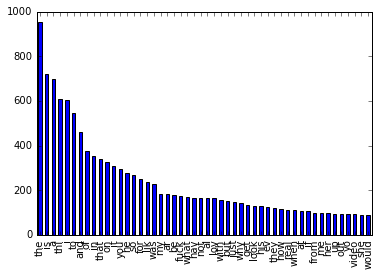

In [13]:
keyText = []
keyCount = []
for key, value in pt.indexedDictionary.items():
    c = pt.countInRecords([key])
    keyText.append(key)
    keyCount.append(c)
    
s1 = pa.Series(keyCount,index=keyText)

sortedS1  = s1.sort_values(ascending= False)[:50]

sortedS1.plot.bar()

In [14]:
df = pa.DataFrame(index=sortedS1.index, columns=sortedS1.index)
df = df.fillna(0)

In [15]:
names = sortedS1.index
colsdone = 0
for col in names:
    colsdone += 1
    sys.stdout.write("\rCols done : %i" % colsdone)
    for row in names:
        df[col][row] = pt.countInRecords([col,row])
sys.stdout.write("\n")
sys.stdout.flush()

Cols done : 50


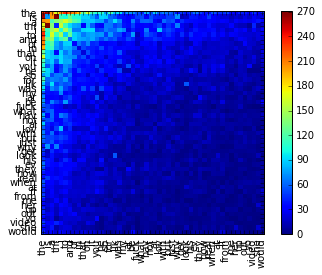

In [16]:
imgplot = plt.imshow(df,interpolation="nearest")
plt.xticks( range(len(names)), names, rotation=90 )
plt.yticks( range(len(names)), names, rotation=0 )
plt.colorbar()
plt.show()

In [23]:
myLabels = pa.Series(labels)
myLabels.sum()

346.0

In [24]:
totalComments = myLabels.count()
totalTrollComments = myLabels.sum()
trollWeight = (totalComments-totalTrollComments)/totalComments
nonTrollWeight = totalTrollComments/totalComments

trollWeight, nonTrollWeight

(0.90020190366310937, 0.099798096336890685)

In [ ]:
# for each troll comment add the troll weight to each word
# for each non troll comment minus the nonTrollWeight from each word

In [ ]:
len(pt.cleanedDictionary)

In [32]:
totalFoundTrolling = myLabels[pt.find(['the'])].sum()
totalFoundTrolling

61.0

In [33]:
totalFoundNotTrolling = pt.find(['the']).sum() - totalFoundTrolling
totalFoundNotTrolling

895.0

In [35]:
trollScore = (totalFoundTrolling * trollWeight) - (totalFoundNotTrolling * nonTrollWeight)
trollScore

-34.406980098067493

In [36]:
trollScores = []
for word in pt.cleanedDictionary:
    totalFoundTrolling = myLabels[pt.find([word])].sum()
    totalFoundNotTrolling = pt.find([word]).sum() - totalFoundTrolling
    trollScore = (totalFoundTrolling * trollWeight) - (totalFoundNotTrolling * nonTrollWeight)
    trollScores.append(trollScore)


In [37]:
trollScores

[4.1179694260167308,
 -1.3951543120853764,
 -1.8860686472454571,
 0.012114219786559133,
 16.041534467839632,
 -2.4888952985289876,
 -1.9959619267378137,
 8.134121719065476,
 -0.69858667435823474,
 -3.4868762618978941,
 0.0020190366310931518,
 -3.3931352754542834,
 -5.7337755985001451,
 -0.19959619267378137,
 -3.6683011248918369,
 0.0020190366310931518,
 2.4759157773291065,
 -0.99798096336890685,
 0.50504759157773327,
 -12.366887799250073,
 -13.837611768099221,
 2.3175656186905114,
 -3.2892991058552061,
 -1.3749639457744447,
 0.10181713296798389,
 0.20161522930487463,
 -7.7539659648110746,
 -0.099798096336890685,
 -0.99394289010672021,
 0.40121142197865595,
 -5.5624459186616662,
 -34.406980098067493,
 -0.48283818863570804,
 -1.2933371791173924,
 -11.206518603980381,
 -3.7822324776463798,
 -1.596769541390251,
 -0.59878857802134411,
 -0.39919238534756274,
 -0.19959619267378137,
 -2.0937409864436112,
 -1.093740986443611,
 -0.097779059705797478,
 -22.377848283818864,
 -4.7862705509085668,
 

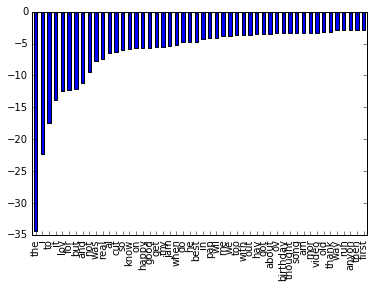

In [39]:
s2 = pa.Series(trollScores,index= pt.cleanedDictionary)

sortedS2  = s2.sort_values(ascending= True)[:50]

sortedS2.plot.bar()

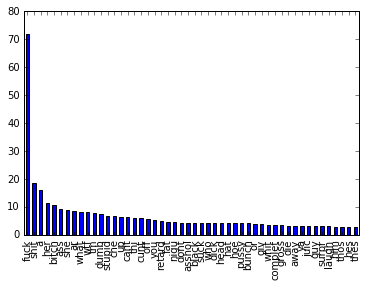

In [40]:
s2 = pa.Series(trollScores,index= pt.cleanedDictionary)

sortedS2  = s2.sort_values(ascending= False)[:50]

sortedS2.plot.bar()